# Activity 1.1 : Neural Networks

Name: Peña, Vhan Randolp S.

Section: CPE32S8

Professor: Engr. Roman Richard

Date: January 26, 2023


#### Objective(s):

This activity aims to demonstrate the concepts of neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use activation function in neural networks
* Demonstrate how to apply feedforward and backpropagation in neural networks


#### Resources:
* Jupyter Notebook


#### Procedure:

Import the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Define and plot an activation function

### Sigmoid function:

$$
\sigma = \frac{1}{1 + e^{-x}}
$$

$\sigma$ ranges from (0, 1). When the input $x$ is negative, $\sigma$ is close to 0. When $x$ is positive, $\sigma$ is close to 1. At $x=0$, $\sigma=0.5$

In [3]:
## create a sigmoid function
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

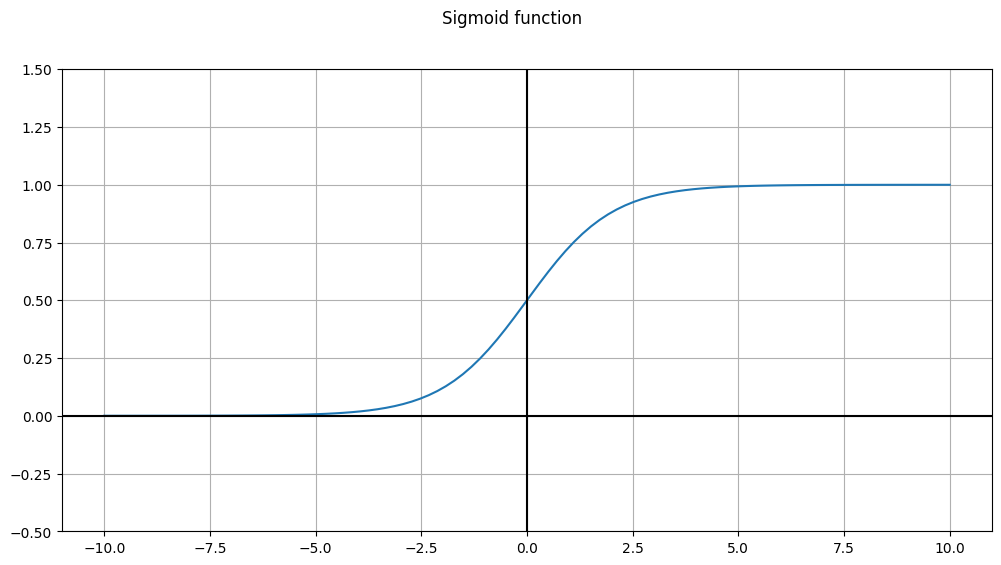

In [4]:
# Plot the sigmoid function
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(vals)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Sigmoid function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

Choose any activation function and create a method to define that function.

In [5]:
def hyperbolic_tan(x):

  return np.tanh(x)

Plot the activation function

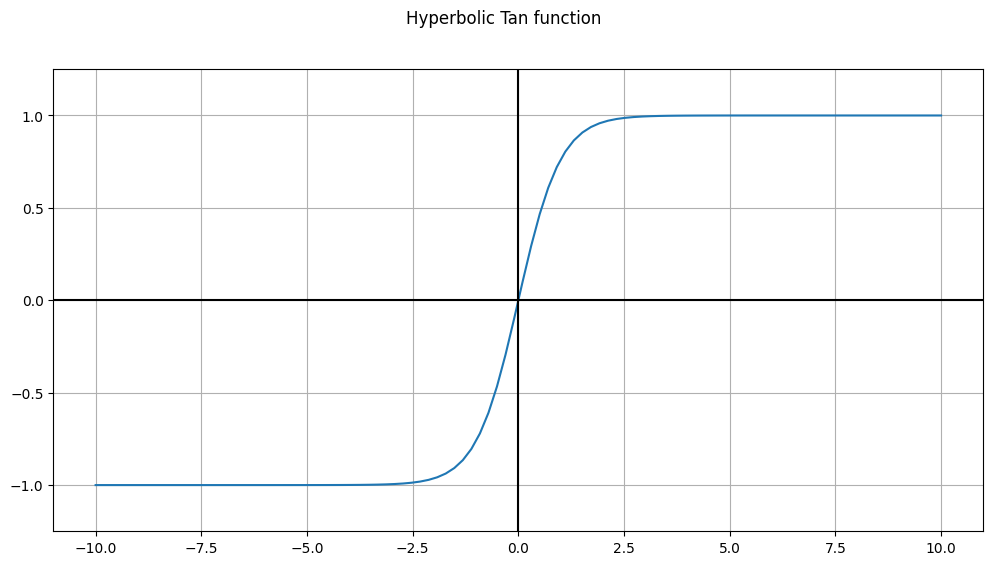

In [6]:
values = np.linspace(-10, 10, num = 100, dtype = np.float32)
activation = hyperbolic_tan(values)
fig = plt.figure(figsize = (12,6))
fig.suptitle('Hyperbolic Tan function')
plt.plot(values, activation)
plt.grid(True, which = 'both')
plt.axhline(y = 0, color = 'k')
plt.axvline(x = 0, color = 'k')
plt.yticks()
plt.ylim([-1.25, 1.25]);

> <p align = 'justify'> Hyperbolic tangent function is another activation function which helps in reducing the loss function. Its curve is much more broader compared to sigmoid function where it can converge data more accurately, separating negative data, zero, and positive data.

(array([-15000., -10000.,  -5000.,      0.,   5000.,  10000.,  15000.]),
 [Text(0, -15000.0, '−15000'),
  Text(0, -10000.0, '−10000'),
  Text(0, -5000.0, '−5000'),
  Text(0, 0.0, '0'),
  Text(0, 5000.0, '5000'),
  Text(0, 10000.0, '10000'),
  Text(0, 15000.0, '15000')])

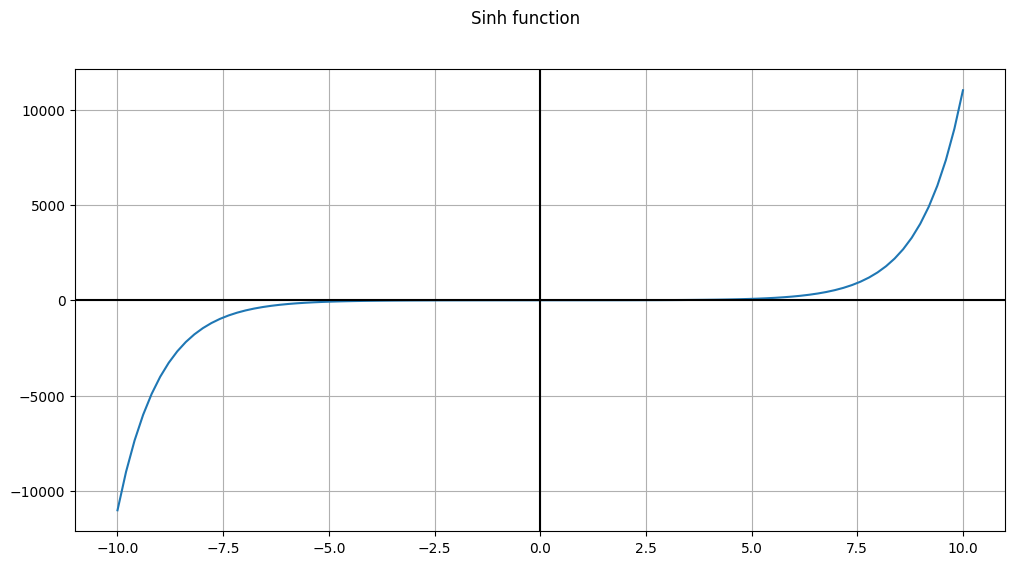

In [7]:
def Sinh(x):
  return np.sinh(x)

values = np.linspace(-10, 10, num = 100, dtype = np.float32)
activation = Sinh(values)
fig = plt.figure(figsize = (12,6))
fig.suptitle('Sinh function')
plt.plot(values, activation)
plt.grid(True, which = 'both')
plt.axhline(y = 0, color = 'k')
plt.axvline(x = 0, color = 'k')
plt.yticks()
#plt.ylim([-1.25, 1.25]);

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, -2000.0, '−2000'),
  Text(0, 0.0, '0'),
  Text(0, 2000.0, '2000'),
  Text(0, 4000.0, '4000'),
  Text(0, 6000.0, '6000'),
  Text(0, 8000.0, '8000'),
  Text(0, 10000.0, '10000'),
  Text(0, 12000.0, '12000')])

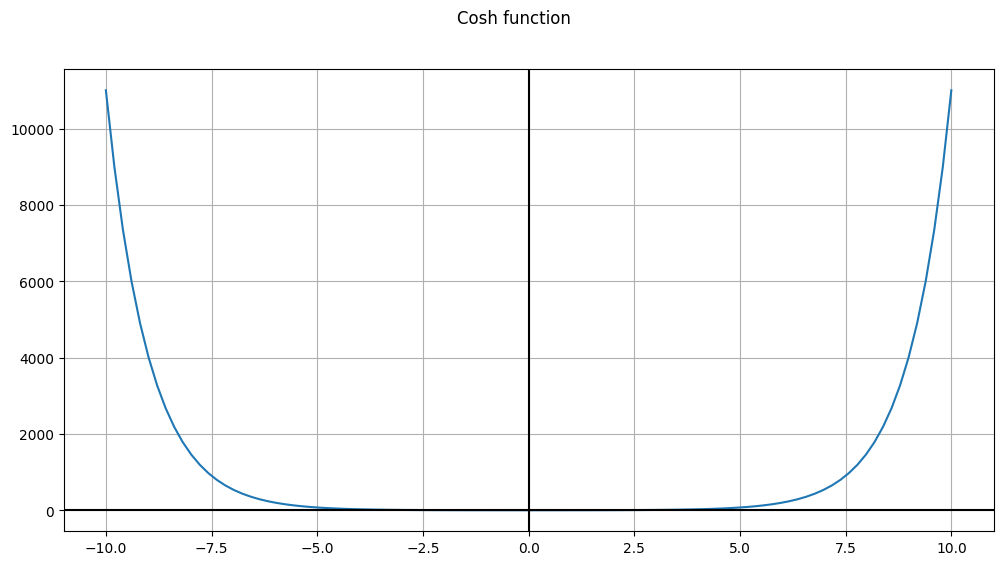

In [8]:
def Cosh(x):
  return np.cosh(x)

values = np.linspace(-10, 10, num = 100, dtype = np.float32)
activation = Cosh(values)
fig = plt.figure(figsize = (12,6))
fig.suptitle('Cosh function')
plt.plot(values, activation)
plt.grid(True, which = 'both')
plt.axhline(y = 0, color = 'k')
plt.axvline(x = 0, color = 'k')
plt.yticks()
#plt.ylim([-1.25, 1.25]);

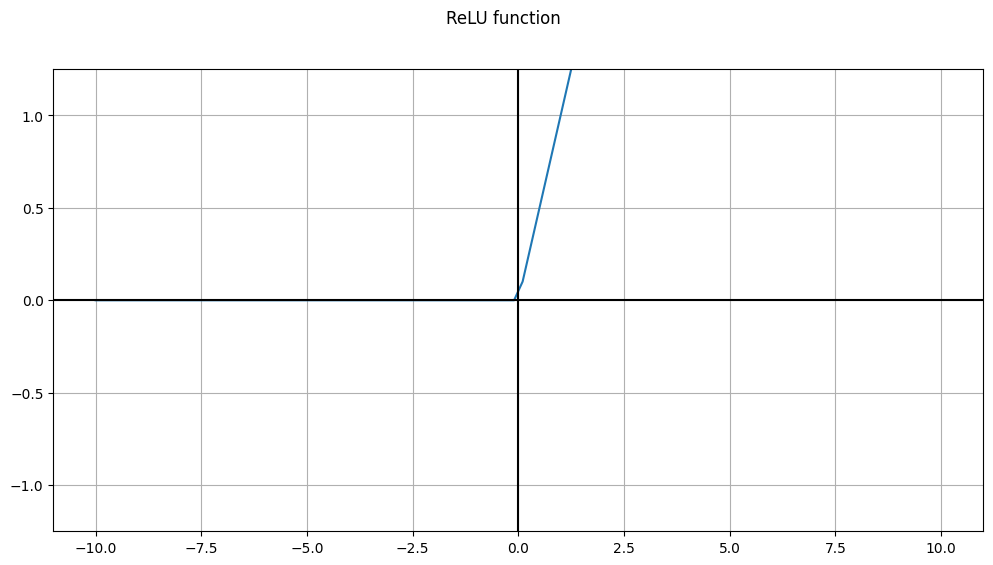

In [9]:
def ReLU(x):
  return np.maximum(0, x)

values = np.linspace(-10, 10, num = 100, dtype = np.float32)
activation = ReLU(values)
fig = plt.figure(figsize = (12,6))
fig.suptitle('ReLU function')
plt.plot(values, activation)
plt.grid(True, which = 'both')
plt.axhline(y = 0, color = 'k')
plt.axvline(x = 0, color = 'k')
plt.yticks()
plt.ylim([-1.25, 1.25]);

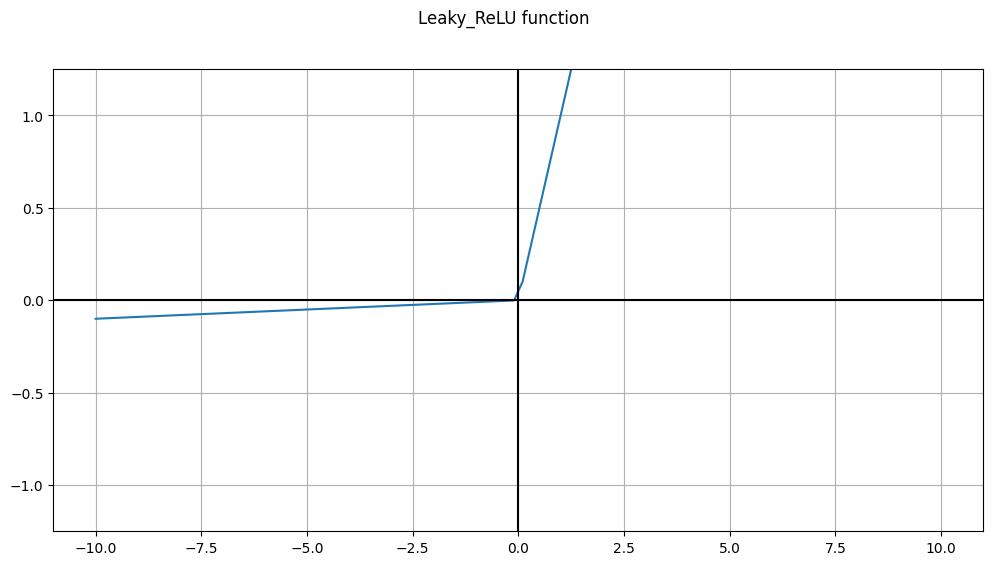

In [10]:
def Leaky_ReLU(x, alpha=0.01):
  return np.maximum(alpha*x, x)

values = np.linspace(-10, 10, num = 100, dtype = np.float32)
activation = Leaky_ReLU(values)
fig = plt.figure(figsize = (12,6))
fig.suptitle('Leaky_ReLU function')
plt.plot(values, activation)
plt.grid(True, which = 'both')
plt.axhline(y = 0, color = 'k')
plt.axvline(x = 0, color = 'k')
plt.yticks()
plt.ylim([-1.25, 1.25]);

### Neurons as boolean logic gates



### OR Gate

<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

A neuron that uses the sigmoid activation function outputs a value between (0, 1). This naturally leads us to think about boolean values.



By limiting the inputs of $x_1$ and $x_2$ to be in $\left\{0, 1\right\}$, we can simulate the effect of logic gates with our neuron. The goal is to find the weights , such that it returns an output close to 0 or 1 depending on the inputs.

What numbers for the weights would we need to fill in for this gate to output OR logic? Observe from the plot above that $\sigma(z)$ is close to 0 when $z$ is largely negative (around -10 or less), and is close to 1 when $z$ is largely positive (around +10 or greater).

$$
z = w_1 x_1 + w_2 x_2 + b
$$

Let's think this through:

* When $x_1$ and $x_2$ are both 0, the only value affecting $z$ is $b$. Because we want the result for (0, 0) to be close to zero, $b$ should be negative (at least -10)
* If either $x_1$ or $x_2$ is 1, we want the output to be close to 1. That means the weights associated with $x_1$ and $x_2$ should be enough to offset $b$ to the point of causing $z$ to be at least 10.
* Let's give $b$ a value of -10. How big do we need $w_1$ and $w_2$ to be?
    * At least +20
* So let's try out $w_1=20$, $w_2=20$, and $b=-10$!

In [11]:
def logic_gate(w1, w2, b):
    # Helper to create logic gate functions
    # Plug in values for weight_a, weight_b, and bias
    return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

def test(gate):
    # Helper function to test out our weight functions.
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{}, {}: {}".format(a, b, np.round(gate(a, b))))

In [12]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

Try finding the appropriate weight values for each truth table.

### AND Gate

<table>

<tr>
<th colspan="3">AND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>


Try to figure out what values for the neurons would make this function as an AND gate.

In [13]:
# Fill in the w1, w2, and b parameters such that the truth table matches
w1 = 20
w2 = 20
b = -30
and_gate = logic_gate(w1, w2, b)

test(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


> <p align = 'justify'> In this gate, we expect to only produce a weighted sum that greater than 1 when both inputs are 1. Therefore, we set -30 as bias and +20 for both weights where it will only produce a sum of greater than 0 when both inputs are 1. So that the sigmoid function will tilt or lean in positive class. Otherwise, it will be negative value as the case when only 1 input is 1, it will only give a weighted sum of -10.

Do the same for the NOR gate and the NAND gate.

### Nor gate

In [14]:
w1 = -15
w2 = -15
b = 10
nor_gate = logic_gate(w1, w2, b)

test(nor_gate)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


> <p align = 'justify'> This gate works the opposite way as the or gate. We only need to have a positive weighted sum when x = 0 and y = 0 so we set the bias into positive value. The bias is 10 so that even when the (1, 1) is being weighed, its weighted sum is still into the negative value.

### Nand gate

In [15]:
w1 = -10
w2 = -10
b = 20
nand_gate = logic_gate(w1, w2, b)

test(nand_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


> <p align = 'justify'> Nand gate is only opposite of And gate so we reverse the signs of the weights and bias of the And gate.

#### **Observation:**

## Limitation of single neuron

 Here's the truth table for XOR:

### XOR (Exclusive Or) Gate

<table>

<tr>
<th colspan="3">XOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

Now the question is, can you create a set of weights such that a single neuron can output this property?

It turns out that you cannot. Single neurons can't correlate inputs, so it's just confused. So individual neurons are out. Can we still use neurons to somehow form an XOR gate?


In [16]:
# Make sure you have or_gate, nand_gate, and and_gate working from above!
def xor_gate(a, b):
    c = or_gate(a, b)
    d = nand_gate(a, b)
    return and_gate(c, d)
test(xor_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


> <p align = 'justify'> This xor gate is combination of other gates/neurons. Therefore, the values of the weights of the individual gates should be considered carefully as it will greatly affect the result on this xor gate.

#### **Observation:**

## Feedforward Networks

The feed-forward computation of a neural network can be thought of as matrix calculations and activation functions.  We will do some actual computations with matrices to see this in action.

## Exercise
Provided below are the following:

- Three weight matrices `W_1`, `W_2` and `W_3` representing the weights in each layer.  The convention for these matrices is that each $W_{i,j}$ gives the weight from neuron $i$ in the previous (left) layer to neuron $j$ in the next (right) layer.  
- A vector `x_in` representing a single input and a matrix `x_mat_in` representing 7 different inputs.
- Two functions: `soft_max_vec` and `soft_max_mat` which apply the soft_max function to a single vector, and row-wise to a matrix.

The goals for this exercise are:
1. For input `x_in` calculate the inputs and outputs to each layer (assuming sigmoid activations for the middle two layers and soft_max output for the final layer.
2. Write a function that does the entire neural network calculation for a single input
3. Write a function that does the entire neural network calculation for a matrix of inputs, where each row is a single input.
4. Test your functions on `x_in` and `x_mat_in`.

This illustrates what happens in a NN during one single forward pass. Roughly speaking, after this forward pass, it remains to compare the output of the network to the known truth values, compute the gradient of the loss function and adjust the weight matrices `W_1`, `W_2` and `W_3` accordingly, and iterate. Hopefully this process will result in better weight matrices and our loss will be smaller afterwards

In [17]:
W_1 = np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_2 = np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3 = np.array([[-1,3,-2],[1,-1,-3],[3,-2,2],[1,2,1]])
x_in = np.array([.5,.8,.2])
x_mat_in = np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],[.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])

def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))

print('the matrix W_1\n')
print(W_1)
print('-'*30)
print('vector input x_in\n')
print(x_in)
print ('-'*30)
print('matrix input x_mat_in -- starts with the vector `x_in`\n')
print(x_mat_in)

the matrix W_1

[[ 2 -1  1  4]
 [-1  2 -3  1]
 [ 3 -2 -1  5]]
------------------------------
vector input x_in

[0.5 0.8 0.2]
------------------------------
matrix input x_mat_in -- starts with the vector `x_in`

[[0.5 0.8 0.2]
 [0.1 0.9 0.6]
 [0.2 0.2 0.3]
 [0.6 0.1 0.9]
 [0.5 0.5 0.4]
 [0.9 0.1 0.9]
 [0.1 0.8 0.7]]


## Exercise
1. Get the product of array x_in and W_1 (z2)
2. Apply sigmoid function to z2 that results to a2
3. Get the product of a2 and z2 (z3)
4. Apply sigmoid function to z3 that results to a3
5. Get the product of a3 and z3 that results to z4


In [18]:
# Get the product of array x_in and W_1 (z2)
z2 = np.dot(x_in, W_1)
print('Get the product of array x_in and W_1 (z2)')
print('\t z2: ', z2, '\n')

# Apply sigmoid function to z2 that results to a2
a2 = sigmoid(z2)
print('Apply sigmoid function to z2 that results to a2')
print('\t a2: ', a2, '\n')

# Get the product of a2 and z2 (z3)
z3 = np.dot(a2, W_2)
print('Get the product of a2 and z2 (z3)')
print('\t z3: ', z3, '\n')

# Apply sigmoid function to z3 that results to a3
a3 = sigmoid(z3)
print('Apply sigmoid function to z3 that results to a3')
print('\t a3: ', a3, '\n')

# Get the product of a3 and z3 that results to z4
z4 = np.dot(a3, W_3)
print('Get the product of a3 and z3 that results to z4')
print('\t z4: ', z4)

Get the product of array x_in and W_1 (z2)
	 z2:  [ 0.8  0.7 -2.1  3.8] 

Apply sigmoid function to z2 that results to a2
	 a2:  [0.68997448 0.66818777 0.10909682 0.97811873] 

Get the product of a2 and z2 (z3)
	 z3:  [ 3.55880727  4.01355384  0.48455118 -1.55014198] 

Apply sigmoid function to z3 that results to a3
	 a3:  [0.97231549 0.98225163 0.61882199 0.17506576] 

Get the product of a3 and z3 that results to z4
	 z4:  [ 2.04146788  1.04718238 -3.47867612]


In [19]:
def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))


7. Apply soft_max_vec function to z4 that results to y_out

In [20]:
# Apply soft_max_vec function to z4 that results to y_out

print('Apply soft_max_vec function to z4 that results to y_out')
y_out = soft_max_vec(z4)
print('\t y_out: ', y_out)

Apply soft_max_vec function to z4 that results to y_out
	 y_out:  [0.72780576 0.26927918 0.00291506]


> <p align = 'justify'> askdkasd

In [21]:
## A one-line function to do the entire neural net computation

def nn_comp_vec(x):
    return soft_max_vec(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

def nn_comp_mat(x):
    return soft_max_mat(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

In [22]:
nn_comp_vec(x_in)

array([0.72780576, 0.26927918, 0.00291506])

In [23]:
nn_comp_mat(x_mat_in)

array([[0.72780576, 0.26927918, 0.00291506],
       [0.62054212, 0.37682531, 0.00263257],
       [0.69267581, 0.30361576, 0.00370844],
       [0.36618794, 0.63016955, 0.00364252],
       [0.57199769, 0.4251982 , 0.00280411],
       [0.38373781, 0.61163804, 0.00462415],
       [0.52510443, 0.4725011 , 0.00239447]])

## Backpropagation
The backpropagation in this part will be used to train a multi-layer perceptron (with a single hidden layer).  Different patterns will be used and the demonstration on how the weights will converge. The different parameters such as learning rate, number of iterations, and number of data points will be demonstrated

In [24]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?


shape of x_mat_full is (500, 3)
shape of y is (500,)


<ipython-input-25-0f8bccfdade3>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
<ipython-input-25-0f8bccfdade3>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


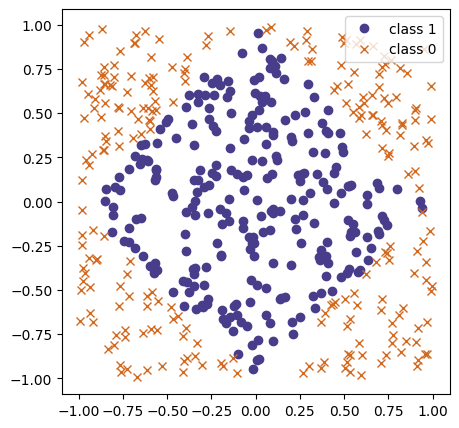

In [25]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

In [26]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)

    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Complete the pseudocode below

I: 0, loss: 0.833294437664581, accuracy: 0.478
I: 200, loss: 0.6845069216426383, accuracy: 0.638
I: 400, loss: 0.6601937563783626, accuracy: 0.79
I: 600, loss: 0.5733543740452924, accuracy: 0.772
I: 800, loss: 0.4965271984736598, accuracy: 0.774
I: 1000, loss: 0.4719655722139729, accuracy: 0.772
I: 1200, loss: 0.45761699394239713, accuracy: 0.772
I: 1400, loss: 0.4175488593999632, accuracy: 0.812
I: 1600, loss: 0.3607163637361406, accuracy: 0.836
I: 1800, loss: 0.32272174213720334, accuracy: 0.888
I: 2000, loss: 0.29618680518963253, accuracy: 0.9
I: 2200, loss: 0.2696787911997874, accuracy: 0.914
I: 2400, loss: 0.2422691243486806, accuracy: 0.938
I: 2600, loss: 0.21961155414862596, accuracy: 0.952
I: 2800, loss: 0.20248371692076422, accuracy: 0.964
I: 3000, loss: 0.18951665466131623, accuracy: 0.97
I: 3200, loss: 0.17937367001432916, accuracy: 0.976
I: 3400, loss: 0.1711394381299204, accuracy: 0.978
I: 3600, loss: 0.1642397193138162, accuracy: 0.978
I: 3800, loss: 0.15831853597617448, 

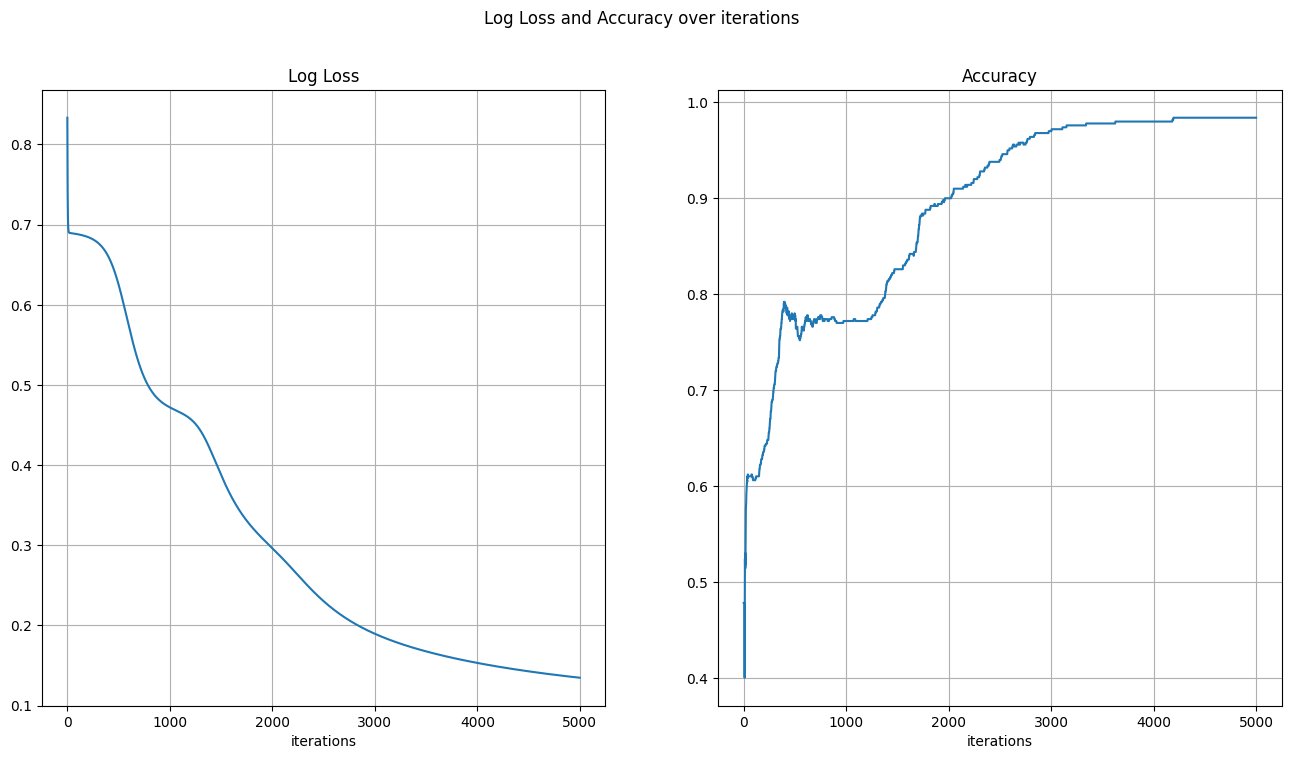

In [27]:
#### Initialize the network parameters

np.random.seed(1241)

W_1 = np.random.uniform(-1,1,size = (3, 4))
W_2 = np.random.uniform(-1,1,size = (4))
num_iter = 5000
learning_rate = 0.001
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, (grad_1, grad_2) = forward_pass(W_1, W_2)

    ## Update the weight matrices
    W_1 = W_1 - learning_rate*grad_1
    W_2 = W_2 - learning_rate*grad_2

    ### Compute the loss and accuracy
    loss = loss_fn(y, y_pred)
    loss_vals.append(loss)

    accuracy = np.sum((y_pred >= 0.5) == y) / num_obs
    accuracies.append(accuracy)

    ## Print the loss and accuracy for every 200th iteration
    if (i % 200) == 0:
      print('I: {}, loss: {}, accuracy: {}'.format(i, loss, accuracy))


plot_loss_accuracy(loss_vals, accuracies)

> <p align = 'justify'> This graph will show the progression between the loss and accuracy of every pattern and combination of number of iterations and learning rate. The circle took 3600 iterations to reach 95.6% accuracy, the diamond has 98.2% in 2800 iterations, 94.4% in 5000 iterations for centered squared, the thick right angle took 2000 iterations that reached 98.2% accuracy, and thin right angle has 97.4% accuracy in 3200 iterations.

> <p align = 'justify'> Looking back to the forward_pass function, it returns 3 values, y_pred and set of J_W_1_grad and J_W_2_grad, so we pass it to y_pred, grad_1 and grad_2. Therefore, we feed forward the input then after reaching at the last layer, we compute for the gradient then passing it to the first layer. Then we update the weight and look for the loss and accuracy.



Plot the predicted answers, with mistakes in yellow

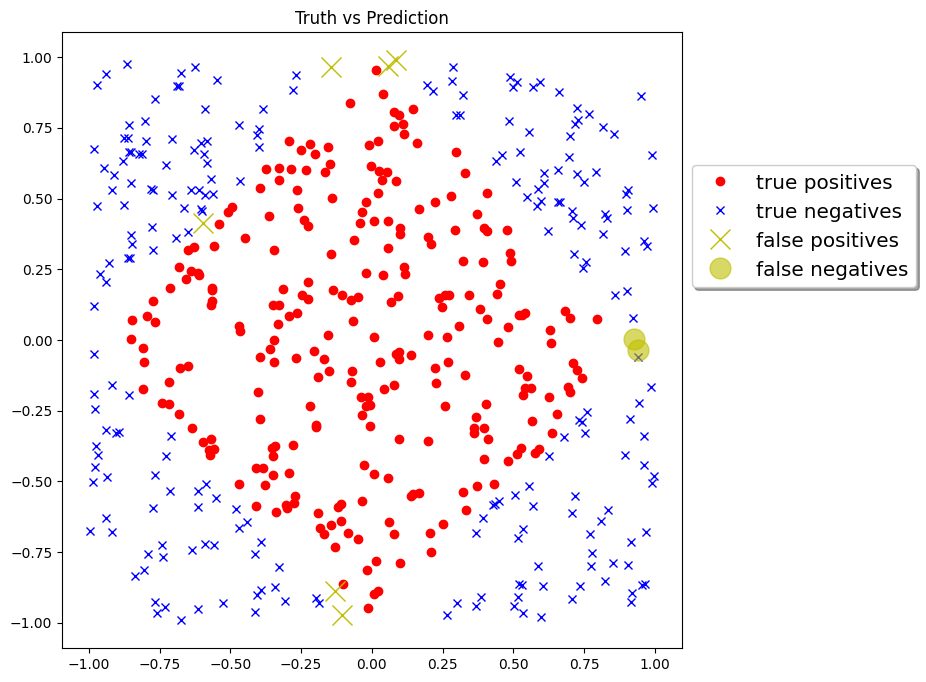

In [28]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')

# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)

ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

Once your code is running, try it for the different patterns below.

Which patterns was the neural network able to learn quickly and which took longer?
What learning rates and numbers of iterations worked well?

#### **Observation**


> <p align = 'justify'> 5000 iterations and 0.001 learning rate works well for all function and gave us a consistent decreasing loss and increasing accuracy. Given this number of iteration and learning rate, the thick right angle and diamond pattern learned quickly and centered square took the longest.




#### Supplementary Activity

1. Use a different weights , input and activation function
2. Apply feedforward and backpropagation
3. Plot the loss and accuracy for every 300th iteration


shape of x_mat_full is (750, 3)
shape of y is (750,)


<ipython-input-29-5fb4b0640b7a>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
<ipython-input-29-5fb4b0640b7a>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


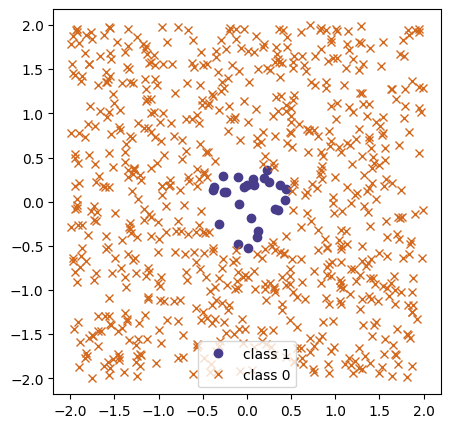

In [29]:
num_obs = 750
x_mat_1 = np.random.uniform(-2,2,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<0.6).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

In [30]:
def forward_pass_tanh(W1, W2):
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W1)
    a_2 = hyperbolic_tan(z_2)
    z_3 = np.dot(a_2, W2)
    y_pred = hyperbolic_tan(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = hyperbolic_tan(z_2)*(1-hyperbolic_tan(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)

    # return
    return y_pred, gradient

I: 0, loss: 1.3882518525398944, accuracy: 0.8653333333333333
I: 300, loss: 1.342357047341401, accuracy: 0.916
I: 600, loss: 1.3028461540327174, accuracy: 0.9666666666666667
I: 900, loss: 1.274488040150312, accuracy: 0.9666666666666667


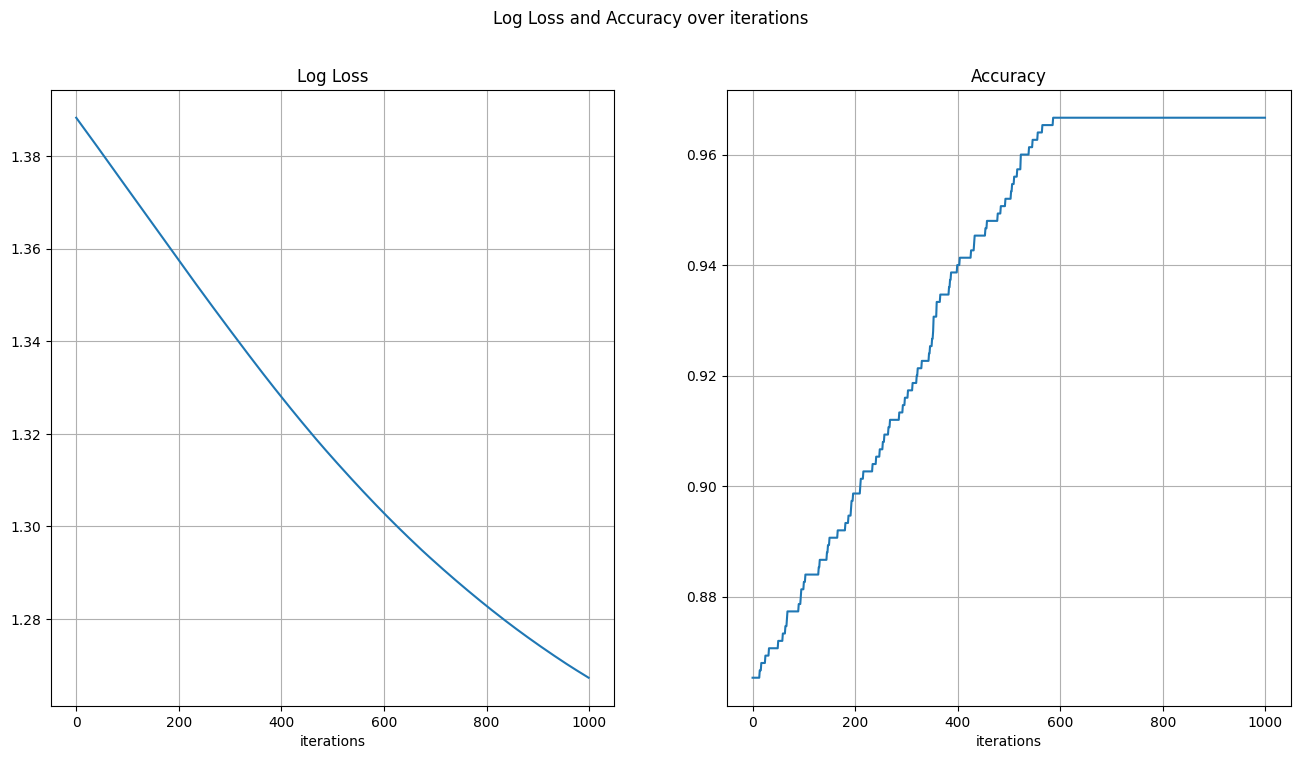

In [39]:
#### Initialize the network parameters

np.random.seed(236)

W_1 = np.random.uniform(-1,1,size = (3, 4))
W_2 = np.random.uniform(-1,1,size = (4))
num_iter = 1000
learning_rate = 0.000002
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, (grad_1, grad_2) = forward_pass_tanh(W_1, W_2)

    ## Update the weight matrices
    W_1 = W_1 - learning_rate*grad_1
    W_2 = W_2 - learning_rate*grad_2

    ### Compute the loss and accuracy
    loss = loss_fn(y, y_pred)
    loss_vals.append(loss)

    accuracy = np.sum((y_pred >= 0.5) == y) / num_obs
    accuracies.append(accuracy)

    ## Print the loss and accuracy for every 200th iteration
    if (i % 300) == 0:
      print('I: {}, loss: {}, accuracy: {}'.format(i, loss, accuracy))


plot_loss_accuracy(loss_vals, accuracies)

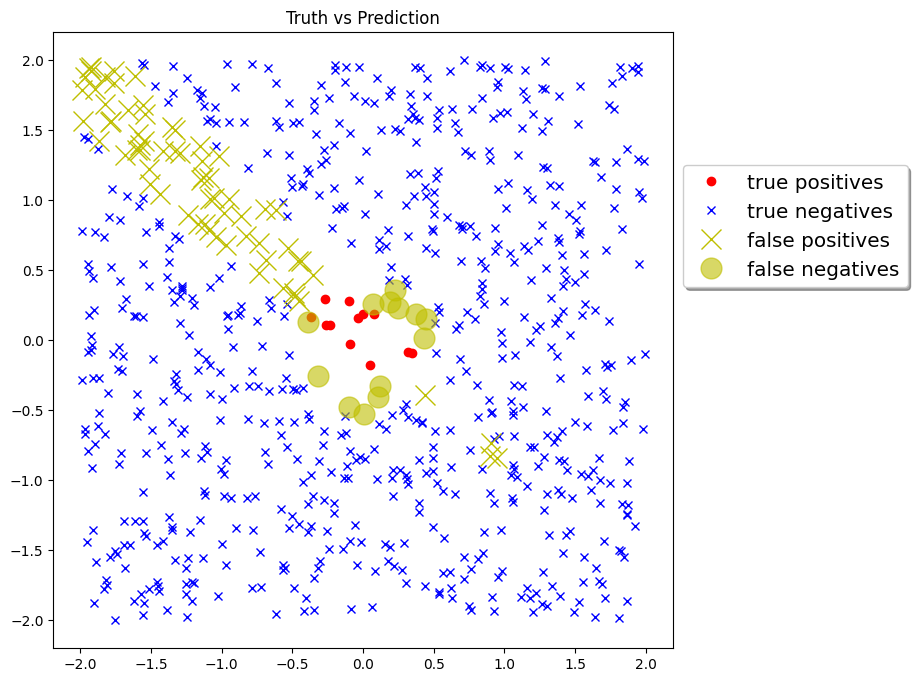

In [32]:
pred1 = (y_pred>= 0.1)
pred0 = (y_pred< 0.1)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')

# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)

ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

#### Conclusion

<p align = 'justify'> In this activity, we're introduced to neutrons, the foundation of deep learning. This foundation is based in actual neurons where it follows a feed-forward process. Feed-forward process refers to the inputting of data, processing, and output. It passes through several processes which is defined in the hidden layer where we can found weighing of biases and also activation function. These hidden layers allows the model to learn and find pattern by depending on the weight and on the feedfack that the activation function will give.

<p align = 'justify'> The reenacting neurons as logic gates makes the understanding on a neuron as it requires serious consideration on the weights and undergo into activation function in order to proceed whether the following combination of input is 0 or 1. It also showed the limitation of a single neuron which can be solved by performing an action through several neurons similar to xor gate. The feedforward activity showed us the step by step process occuring in this step such as weighing sum and activation functions. Back propagation refers to the adjustment of the weights as it traverses back to the first layer in order to compute for the gradient.

<p align = 'justify'> In this activity, I've seen how to initialize the network parameters and also a glimpse of behavior on the different dataset such as circle, diamond, etc. For the supplementary activity, I've faced some trouble on how to calibrate or change some of the parameters as I used the hyperbolic tangent activation function that is much broader compared to sigmoid function. I think I gained a fair understanding on some concepts in this module but I still have difficulties on adjustments in coding when usage of different data shape or such.

https://colab.research.google.com/drive/18b8Ku66mTfVTfeJXslWpJzrrbNRQD7i_#scrollTo=XiElRIBUYn2m